<a href="https://colab.research.google.com/github/JSJeong-me/Machine_Learning/blob/main/ML/6-Learning_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Epoch 197: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.

Epoch 202: ReduceLROnPlateau reducing learning rate to 9.999999310821295e-05.

Epoch 207: ReduceLROnPlateau reducing learning rate to 9.999999019782991e-06.

Epoch 212: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-07.

Epoch 217: ReduceLROnPlateau reducing learning rate to 9.99999883788405e-08.

Epoch 222: ReduceLROnPlateau reducing learning rate to 9.999998695775504e-09.

Epoch 227: ReduceLROnPlateau reducing learning rate to 9.99999905104687e-10.

Epoch 232: ReduceLROnPlateau reducing learning rate to 9.999998606957661e-11.

Epoch 237: ReduceLROnPlateau reducing learning rate to 9.99999874573554e-12.

Epoch 242: ReduceLROnPlateau reducing learning rate to 9.999999092680235e-13.

Epoch 247: ReduceLROnPlateau reducing learning rate to 9.9999988758398e-14.

Epoch 252: ReduceLROnPlateau reducing learning rate to 9.999999146890344e-15.

Epoch 257: ReduceLROnPlateau reducing learning rate to 9.

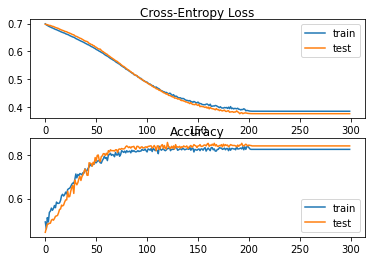

In [1]:
# example of a learning rate schedule
from sklearn.datasets import make_circles
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.callbacks import ReduceLROnPlateau
from matplotlib import pyplot
# generate dataset
X, y = make_circles(n_samples=1000, noise=0.1, random_state=1)
# split into train and test
n_train = 500
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]
# define model
model = Sequential()
model.add(Dense(50, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
# define learning rate schedule
rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_delta=1E-7, verbose=1)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=300, verbose=0, callbacks=[rlrp])
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()